# Trabajo Practico n° 1
### Grupo 27

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

#### Se cargan los datos

In [6]:
train = pd.read_csv('train.csv',encoding='latin-1')
test = pd.read_csv('test.csv', encoding='latin-1')
sample = pd.read_csv('sample_submission.csv', encoding='latin-1')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
id          3263 non-null int64
keyword     3237 non-null object
location    2158 non-null object
text        3263 non-null object
dtypes: int64(1), object(3)
memory usage: 102.0+ KB


In [9]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
id        3263 non-null int64
target    3263 non-null int64
dtypes: int64(2)
memory usage: 51.1 KB


In [15]:
print(train.describe())
print(test.describe())
print(sample.describe())

                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000
                 id
count   3263.000000
mean    5427.152927
std     3146.427221
min        0.000000
25%     2683.000000
50%     5500.000000
75%     8176.000000
max    10875.000000
                 id  target
count   3263.000000  3263.0
mean    5427.152927     0.0
std     3146.427221     0.0
min        0.000000     0.0
25%     2683.000000     0.0
50%     5500.000000     0.0
75%     8176.000000     0.0
max    10875.000000     0.0


Por lo que veo que tanto los textos (tweets) como el target nunca son nill, aunque las keyword y las location si

In [19]:
print(train['keyword'].hasnans)
print(train['location'].hasnans)
print(train['target'].hasnans)
print(train['text'].hasnans)

True
True
False
False


In [20]:
train.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

#### Me fijo la distribución de tweets quese tratan de casos reales de las que no

In [37]:
target_total = train.target.value_counts()
target_total

0    4342
1    3271
Name: target, dtype: int64

Si es 0 (cero) el caso no es real; si es 1 (uno) es real

Text(0,0.5,'Cantidad de tweets')

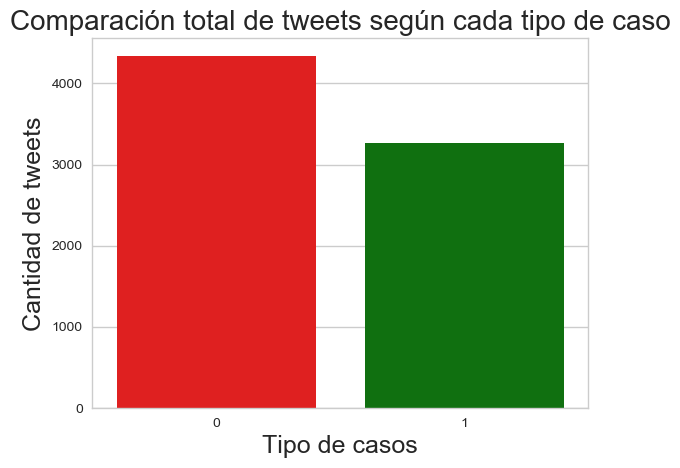

In [93]:
g = sns.barplot(x=target_total.index, y=target_total.values, orient='v', palette=['red','green'])
g.set_title("Comparación total de tweets según cada tipo de caso", fontsize=20)
g.set_xlabel("Tipo de casos", fontsize=18)
g.set_ylabel("Cantidad de tweets", fontsize=18)

Acá podemos ver que del total de tweets que tenemos en el dataframe el 57% de los tweets son de casos no reales y el 43% son de casos reales

### Analizamos los largos de cada tweet

In [47]:
con_len_tweets = train[['id','text','target']]
con_len_tweets['len'] = con_len_tweets['text'].str.len()
con_len_tweets

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,text,target,len
0,1,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,Forest fire near La Ronge Sask. Canada,1,38
2,5,All residents asked to 'shelter in place' are ...,1,133
3,6,"13,000 people receive #wildfires evacuation or...",1,65
4,7,Just got sent this photo from Ruby #Alaska as ...,1,88
5,8,#RockyFire Update => California Hwy. 20 closed...,1,110
6,10,#flood #disaster Heavy rain causes flash flood...,1,95
7,13,I'm on top of the hill and I can see a fire in...,1,59
8,14,There's an emergency evacuation happening now ...,1,79
9,15,I'm afraid that the tornado is coming to our a...,1,52


Sabemos que cada tweet tiene un maximo de 280 caracteres

In [48]:
con_len_tweets['len'].describe()

count               7,613.00
mean                  101.34
std                    33.99
min                     7.00
25%                    78.00
50%                   107.00
75%                   134.00
max                   163.00
Name: len, dtype: float64

Podemos ver que el promedio de longitud de todos los tweets es aproximadamente de 101 caracteres.

Podemos ver que lso tweets que tienen entre aproximadamente 80 caracteres y 150 son en los que predominan los casos reales, en cambio cuando es menor a 75 caracteres y mayor a 150 caracteres la mayoría de tweets son de casos no reales

Text(0,0.5,'Densidad de tweets')

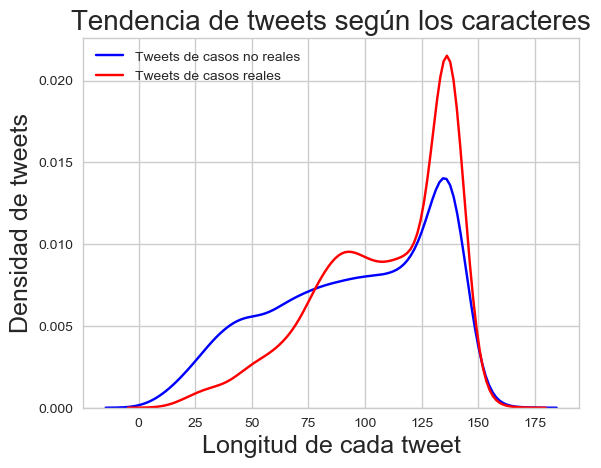

In [51]:
g = sns.distplot(con_len_tweets[con_len_tweets['target'] == 0]['len'], color='blue', label='Tweets de casos no reales', hist=False)
g = sns.distplot(con_len_tweets[con_len_tweets['target'] == 1]['len'], color='red', label='Tweets de casos reales', hist=False)

g.set_title("Tendencia de tweets según los caracteres", fontsize=20)
g.set_xlabel("Longitud de cada tweet", fontsize=18)
g.set_ylabel("Densidad de tweets", fontsize=18)

Analisis de las palabras mas frecuentes en todos los tweets

In [81]:
tweets=train.loc[:,['text']]['text'].transform(lambda palabras: palabras.lower()).value_counts()
tweets

11-year-old boy charged with manslaughter of toddler: report: an 11-year-old boy has been charged with manslaughter over the fatal sh...            10
#bestnaijamade: 16yr old pkk suicide bomber who detonated bomb in ... http://t.co/ksawlyux02 bestnaijamade bestnaijamade bestnaijamade beâã_       6
he came to a land which was engulfed in tribal war and turned it into a land of peace i.e. madinah. #prophetmuhammad #islam                          6
the prophet (peace be upon him) said 'save yourself from hellfire even if it is by giving half a date in charity.'                                   6
madhya pradesh train derailment: village youth saved many lives                                                                                      5
that horrible sinking feeling when youâãâªve been at home on your phone for a while and you realise its been on 3g this whole time                 5
to fight bioterrorism sir.                                                                    

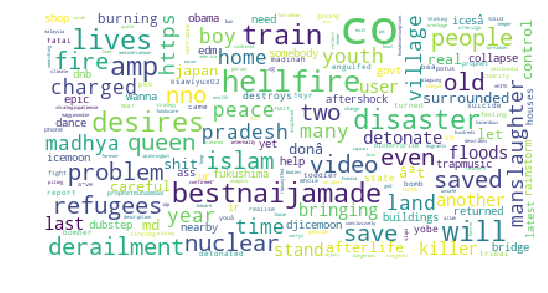

In [83]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(tweets))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### MEJORAR ESTE ANALISIS ↑↑↑

El total de registro de tweets es de 7613. Me fijo la localizaciones de cada tweets

In [121]:
# Saco la localización de cada tweet
localizacion = train['location'].value_counts().sort_values(ascending=False)
#localizacion = localizacion.rename(columns={'location': "total", 'index' : 'location'})
localizacion

USA                              104
New York                          71
United States                     50
London                            45
Canada                            29
Nigeria                           28
UK                                27
Los Angeles, CA                   26
India                             24
Mumbai                            22
Washington, DC                    21
Kenya                             20
Worldwide                         19
Chicago, IL                       18
Australia                         18
California                        17
New York, NY                      15
California, USA                   15
Everywhere                        15
United Kingdom                    14
Florida                           14
San Francisco                     14
Washington, D.C.                  13
Los Angeles                       13
Indonesia                         13
NYC                               12
Ireland                           12
T

Vemos que el total de localizaciones es de 3341 tweets sobre los 7613 totales. Por lo que solo el 43% de los tweets tienen localización.

Text(0,0.5,'Localización')

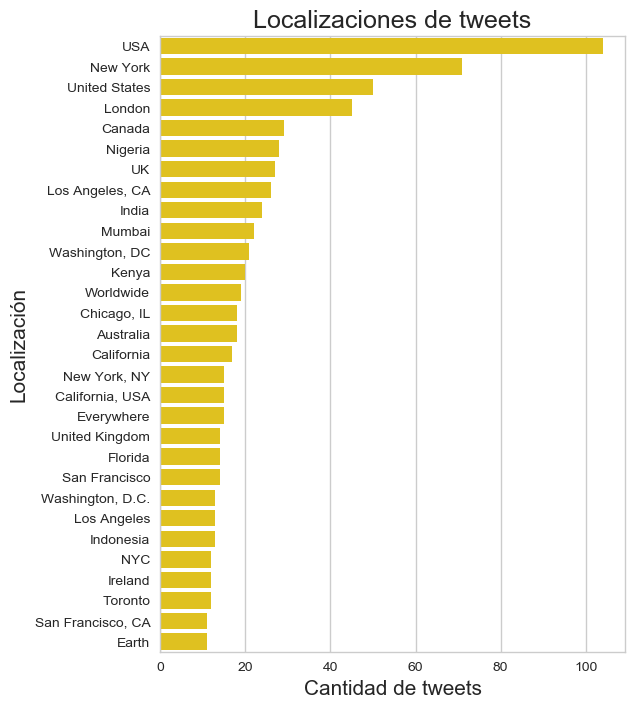

In [139]:
# Vamos a trabajar con las primeras 30 localizaciones
localizacion = localizacion.head(30)
plt.figure(figsize=(6,8))
g = sns.barplot(x=localizacion.values, y=localizacion.index, orient='h', color='gold')
g.set_title("Localizaciones de tweets", fontsize=18)
g.set_xlabel("Cantidad de tweets", fontsize=15)
g.set_ylabel("Localización", fontsize=15)

## VER de AGREGAR cantidad en cada barra de grafico ↑↑↑

Analizar keyword!!!